**深度学习与机器学习及其 AI 的关系**

AI 是一个更广泛的概念，更通俗的讲是机器模拟智能行为特别是人类的行为都可以叫做 AI。AI 从计算机科学、数学及其统计学中得到了启发。

机器学习（ML）是 AI 的一个分支，他更关注在不通过为指定任务编程的情况下教计算机怎样学习。ML 背后的想法是，从数据中学习并预测以次来创建算法是可能的。通常有三种不同的宽泛分类：监督学习（预测数据）、无监督学习（寻找数据结构）和增强学习（机器作为代理与环境交互，学习行为并获得奖励）。

深度学习（DL）又是 ML 的一个子集，它使用人工神经元方法（artificial neural networks, ANN），他是受到人类神经元的启发而创建。

![image](https://ws3.sinaimg.cn/large/69d4185bly1fye7kzzlggj205m05pt8s.jpg)

反向传播算法的基础性文章 [《Backpropagation through Time: What It Does and How to Do It》](http://axon.cs.byu.edu/~martinez/classes/678/Papers/Werbos_BPTT.pdf) by P. J. Werbos 1990 及其 2006 G. E. Hinton 的 [《A Fast Learning Algorithm for Deep
Belief Nets,》](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf) ，1996 年 [《The Roots of Backpropagation: From Ordered Derivatives to
Neural Networks and Political Forecasting, Neural Networks》]() 书， 1986[《Learning Representations by Backpropagating Errors》](https://web.stanford.edu/class/psych209a/ReadingsByDate/02_06/PDPVolIChapter8.pdf) D. E. Rumelhart, G. E. Hinton。 

总结性文章 [《Deep Learning in Neural Networks:
An Overview》](https://arxiv.org/abs/1404.7828) by J. Schmidhuber 2015 年。

# 感知机 与序列化模型

数学形式如下：
$$
\large{
f(x) = 
\begin{cases}
1,&\omega x + b>0 \\ 
0,&otherwise 
\end{cases}
}\tag{1}
$$

在 keras 中可通过 `sequential` 中来实现，他就像一个线性管道（pipeline，Stack）的神经网络层。如下定义一个含有 12 人工神经元， 8 个输入特征的网络层：
```python
from keras.models import Sequential
model = Sequential()
modeladd(Dense (12, input_ dim=8, kernel_initializer='random_uniform') )
```
其中初始化的kernel的方法有如下几种：
- `random_uniform`： 表示在 (-0.05, 0.05) 均匀随机采样较小的数值，即在给定的区间等间隔的采样
- `random_normal`：从 均值为 0 标准差为 0.05 的高斯分布中初始化权重
- `zero`：权重全部为 0 

`Dense` 的意思是前一层的每个神经元都与下一层的每个神经元相连，如下多层感知机：

![image](https://wx4.sinaimg.cn/large/69d4185bly1fye8p23xmlj207c04rjrk.jpg)



感知机的一个缺点是，不能逐渐学习，即学习是跳跃的结果不是 0 就是 1，如下左图；我们希望感知机能逐渐的学习而不是跳跃性的，因此就需要使用到更平滑的函数 Sigmoid 函数，如下右图：
$$
\large{
\begin{split}
\sigma(z) &= \frac{1}{1 + e^{-z}} \\
其中， z &= \omega x + b \\
\end{split}
}\tag{2}
$$
![image](https://wx3.sinaimg.cn/large/69d4185bly1fye8x1qhgkj20gs070t95.jpg)

也就是说，具有 sigmoid 激活函数的神经元行为与感知机类型，但值的改变更加平滑，值可以是 0.5539 或者 0.1253，这样 sigmoid 就具有了回答 概率（maybe） 的能力。

当然也有其他的激活函数如 ReLU，而且他在实际中使用的更广泛：
![image](https://ws1.sinaimg.cn/large/69d4185bly1fye94vf7r0j20ap05edg3.jpg)

常见的 权重、输入（特征）、激活函数的组织形式如下：
![image](https://ws1.sinaimg.cn/large/69d4185bly1fye96decspj20c906c3ys.jpg)

# 手写字识别

**目标函数（损失函数）：**
- MSE （mean squared error）, $\hat{y}$ 为预测值，y 为真实值
$$
\large{
\begin{split}
MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y} - y)^2
\end{split}
}
$$

- 二分类交叉熵，t 为真是目标，p 为预测值
$$
\large{
\begin{split}
-tlog(p) - (1-t)log(1-p)
\end{split}
}
$$

- 类别交叉熵，$t_{i,j}$ 为目标值，$p_{i,j}$ 为预测值，可用于多分类，可用于替代 Softmax
$$
\large{
\begin{split}
L_i = -\sum_{j}t_{i,j}log(p_{ij})
\end{split}
}
$$


**度量**

常见的有 ：
- accuracy
- Precision
- Recall

## 一层模型

In [30]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
### 数据准备
np.random.seed(1671) # for reproducibility .
# network and training
NB_EPOCH = 200 # 在数据集上迭代多少次
BAICH_SIZE = 128 # 每次训练（参数迭代一次，即参数更新）使用多少条数据
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPIIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDAIION_SPLIT=0.2 # how much IRAIN is reserved for VALIDAIION

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape (10000, RESHAPED)
# 为了支持 GPU 计算
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#  normalize 转换到 [0,1]
X_train /= 255
X_test /= 255
print (X_train.shape [0] , 'train samples' )
print (X_test.shape[0], 'test samples')

#convert class vectors to binary class matrices, one-hot encode
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(y_train[0:5])
print(Y_train[0:5])

60000 train samples
10000 test samples
[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [22]:
### 创建、训练模型
# 10 outputs inal stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

# 度量
model.compile(OPIIMIZER, loss="categorical_crossentropy" , metrics=['accuracy'])

# 训练
history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDAIION_SPLIT)

# 评估训练结果
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test score', score[0])
print('Test accuracy', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 29us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 1s 18us/step 

48000/48000 [==============================] - 1s 17us/step - loss: 0.3171 - acc: 0.9121 - val_loss: 0.3044 - val_acc: 0.9149
Epoch 56/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3164 - acc: 0.9121 - val_loss: 0.3037 - val_acc: 0.9156
Epoch 57/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.3157 - acc: 0.9128 - val_loss: 0.3034 - val_acc: 0.9152
Epoch 58/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3149 - acc: 0.9121 - val_loss: 0.3029 - val_acc: 0.9148
Epoch 59/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.3143 - acc: 0.9128 - val_loss: 0.3022 - val_acc: 0.9151
Epoch 60/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.3136 - acc: 0.9129 - val_loss: 0.3016 - val_acc: 0.9161
Epoch 61/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.3130 - acc: 0.9133 - val_loss: 0.3011 - val_acc: 0.9158
Epoch 62/200
48000/48000 [==============

48000/48000 [==============================] - 1s 16us/step - loss: 0.2915 - acc: 0.9189 - val_loss: 0.2854 - val_acc: 0.9210
Epoch 114/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2913 - acc: 0.9188 - val_loss: 0.2853 - val_acc: 0.9211
Epoch 115/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2910 - acc: 0.9189 - val_loss: 0.2852 - val_acc: 0.9205
Epoch 116/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2908 - acc: 0.9189 - val_loss: 0.2849 - val_acc: 0.9213
Epoch 117/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2905 - acc: 0.9193 - val_loss: 0.2847 - val_acc: 0.9213
Epoch 118/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2902 - acc: 0.9192 - val_loss: 0.2846 - val_acc: 0.9212
Epoch 119/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2900 - acc: 0.9191 - val_loss: 0.2844 - val_acc: 0.9212
Epoch 120/200
48000/48000 [=======

48000/48000 [==============================] - 1s 16us/step - loss: 0.2800 - acc: 0.9220 - val_loss: 0.2780 - val_acc: 0.9226
Epoch 172/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2798 - acc: 0.9218 - val_loss: 0.2778 - val_acc: 0.9231
Epoch 173/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2797 - acc: 0.9217 - val_loss: 0.2778 - val_acc: 0.9229
Epoch 174/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2796 - acc: 0.9217 - val_loss: 0.2777 - val_acc: 0.9227
Epoch 175/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2794 - acc: 0.9218 - val_loss: 0.2776 - val_acc: 0.9232
Epoch 176/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2793 - acc: 0.9220 - val_loss: 0.2775 - val_acc: 0.9232
Epoch 177/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2791 - acc: 0.9219 - val_loss: 0.2774 - val_acc: 0.9234
Epoch 178/200
48000/48000 [=======

运行上述代码可以得到如下结果，首先是模型的结构，神经元是如何连接的，有多少参数需要优化，训练和测试数据有多少等：
![image](https://wx3.sinaimg.cn/large/69d4185bly1fyeg2w95vcj20fm05ewf8.jpg)

在一层神经网络上得到的最后总结果为：
```
Traning accuracy 0.9230
Validation accuracy 0.9241
Test score 0.277385849932
Test accuracy 0.9227
```

## 多层模型

In [23]:
NB_EPOCH = 20

# 创建多层模型
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# 度量
model.compile(OPIIMIZER, loss="categorical_crossentropy" , metrics=['accuracy'])

# 训练
history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDAIION_SPLIT)

# 评估训练结果
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test score', score[0])
print('Test accuracy', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Trai

新的结构：
![image](https://ws2.sinaimg.cn/large/69d4185bly1fyegeq30zrj20ft098abb.jpg)

通过添加两层隐藏层可以看到最终的结果为：
```
Test score 0.188384749219
Test accuracy 0.9468
```
比之前有所提高，且训练的周期更短。

## Dropout 

通过 Dropout 可以进一步改善
![image](https://ws4.sinaimg.cn/large/69d4185bly1fyegkauhytj20fr0b4abk.jpg)

最终结果为：
```
Test score 0.192575830617
Test accuracy 0.9424
```
通过增大周期数还可以进一步提高精确度。  
Dropout 之所以有这样的泛化性能，是因为他知道他不能在依赖他的邻居神经元了。

In [27]:
NB_EPOCH = 20
DROPOUT = 0.3

# 创建多层模型
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# 度量
model.compile(OPIIMIZER, loss="categorical_crossentropy" , metrics=['accuracy'])

# 训练
history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDAIION_SPLIT)

# 评估训练结果
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test score', score[0])
print('Test accuracy', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
__________

不同的 Dropout 对最终的结果也有很大的影响：

In [33]:
drop_ratio = np.linspace(0.1, 1.0, 9)
accs = []
for drop in drop_ratio:
    # 度量
    model.compile(SGD(), loss="categorical_crossentropy" , metrics=['accuracy'])

    # 训练
    history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                        epochs=20, verbose=0, validation_split=VALIDAIION_SPLIT)

    # 评估训练结果
    score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
    accs.append(score[1])

10000/10000 [==============================] - 0s 44us/step


TypeError: 'Figure' object is not iterable

<Figure size 432x216 with 0 Axes>

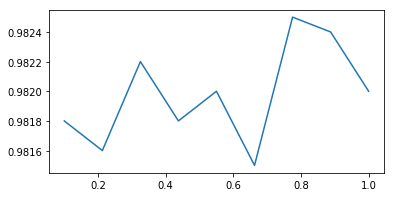

In [35]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(drop_ratio, accs)
plt.show()

## 不同的优化函数

梯度下降的示意图如下：
![image](https://ws3.sinaimg.cn/large/69d4185bly1fyegq87bh6j2091096t92.jpg)

通过求导来找到能让损失函数最小化的权重。

In [29]:
OPIIMIZER = RMSprop()
model.compile(OPIIMIZER, loss="categorical_crossentropy" , metrics=['accuracy'])

# 训练
history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDAIION_SPLIT)

# 评估训练结果
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test score', score[0])
print('Test accuracy', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.2523 - acc: 0.9239 - val_loss: 0.1341 - val_acc: 0.9596
Epoch 2/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1822 - acc: 0.9457 - val_loss: 0.1213 - val_acc: 0.9641
Epoch 3/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1519 - acc: 0.9543 - val_loss: 0.1071 - val_acc: 0.9692
Epoch 4/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1357 - acc: 0.9598 - val_loss: 0.0979 - val_acc: 0.9717
Epoch 5/20
48000/48000 [==============================] - 2s 38us/step - loss: 0.1228 - acc: 0.9628 - val_loss: 0.0996 - val_acc: 0.9724
Epoch 6/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1128 - acc: 0.9672 - val_loss: 0.1040 - val_acc: 0.9727
Epoch 7/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.1023 - acc: 0.9697 - val_loss: 0.0947 - val_acc

最终结果为：
```
acc: 0.9801
val_acc: 0.9750
Test score 0.0922864112344
Test accuracy 0.9777
```

In [37]:
OPIIMIZER = Adam()
model.compile(OPIIMIZER, loss="categorical_crossentropy" , metrics=['accuracy'])

# 训练
history = model.fit(X_train, Y_train, batch_size=BAICH_SIZE, 
                    epochs=NB_EPOCH, verbose=0, validation_split=VALIDAIION_SPLIT)

# 评估训练结果
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score', score[0])
print('Test accuracy', score[1])

Test score 0.0861224654458
Test accuracy 0.9805


## 不同参数

**增加神经元**

增加神经元会让参数显著的增加，训练的时间相应的也会增加：
![image](https://ws3.sinaimg.cn/large/69d4185bly1fyehf5h62aj20ii065jrr.jpg)
![image](https://ws2.sinaimg.cn/large/69d4185bly1fyehg51tdhj20ed0893yz.jpg)

相应的使用精确度：
![image](https://wx4.sinaimg.cn/large/69d4185bly1fyehgtnhnuj20eg07z3yy.jpg)

**参数更新步长的影响**
![image](https://wx3.sinaimg.cn/large/69d4185bly1fyehml02p5j20et084jrs.jpg)

**批次大小的影响**
![image](https://wx2.sinaimg.cn/large/69d4185bly1fyehntpw3jj20e405nglw.jpg)

## 正则化

**学习更多的是关于泛化，而不是记忆**，因此需要在训练精度与验证精度上折中：
![image](https://wx3.sinaimg.cn/large/69d4185bly1fyehrsmuxgj208m0793yo.jpg)

而越复杂的模型越倾向于过拟合，怎么判断模型的复杂度呢？模型只是关于权重的向量不是其他什么，因此判断模型是不是复杂就判断其中参数为零的数量。如果有两个模型 M1 和 M2，两个模型的表现差不多，但是 M1 权重为零的参数比 M2 更多，那么我们可以说模型 M2 比 M1 复杂，而模型 M1 相对简单。

可以通过 λ 来控制模型的复杂度，λ 值越大说明我们就越希望模型简单。

正则化可以用于权重参数 ，也可以用于激活函数和模型。在 Keras 中对权重正则化可以这样：
```python
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))
```

## 预测

训练好了模型就可以进行预测，在 keras 中可以这么做：
```python
model.predict(x)
```
还有其他的几个：
- `model.evaluate()`：用于计算算是
- `model.predict_classes()`：用于计算类别输出
- `model.predict_probs()`：用于计算类的概率

# 反向传播

关键在于**误差**的反向传播：
![image](https://ws1.sinaimg.cn/large/69d4185bly1fyei8o6g28j20du0573z1.jpg)

通过前向传播计算出误差，然后再将其反向传播，通过优化算法来更新权重以减少误差。通常反向传播要进行好几轮，以达到遇到的误差阈值，过程如下：
![image](https://ws1.sinaimg.cn/large/69d4185bly1fyeibvlairj20fx06xdg7.jpg)

上图的 label 与 Features 是学习的驱动力。

在神经网络中，最重要的不是一个神经元输出了什么，而是收集每一层被调整的权重。

# Keras 介绍

keras 中使用不同的后台框架图片数据表示方式是不一样的，TensorFlow 为`(width, heigh, depth)`，而 theno 为 `(depth, width, heigh)`。

tensor 在 keras 中也是很重要的概念，其实他就是多维的数据或者矩阵，不是什么其他东西。

keras 中的模型可以分为 `squential` 和 `functional`，前者就是把各个层堆叠在一起，就如前面我们所做的。函数性则是通过函数型 API来实现，他可以实现复杂的模型，如共享层、有向环状图、多输出模型等。

Keras 中有很多预定义好的层，如：
- 全连接层（Dense）、
- RNN 层（simpleRNN、LSTM、GRU）
- CNN 卷积层（Conv1D、Conv2D）、池化层（MaxPooling1D、MaxPooling2D）

**正则化**
- `kernel_regularizer`：用于权重矩阵
- `bias_regularizer`：偏置项
- `activity_regularizer`：输出层激活函数
- `Dropout`：层正则化

**批归一化**

`BatchNormalization`

预定义的含有激活函数、损失函数、度量、优化、模型保存与加载、训练过程定制化、监测点